In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def leakage_coefficient(num, den):
    
    ci    = [ 0 for _ in range(len(num)) ]
    sigma = [ 0 for _ in range(len(num)) ]
    
    for i in range(len(ci)):
        
        if num[i] > 0 and den[i] > 0:
            
            ci[i]    = num[i]/den[i]
            sigma[i] = ci[i] * math.sqrt((1/num[i]) + (1/den[i]))
    
    return {'mean': ci, 'sigma': sigma}


def correlation_factor(Na, Nb, Ma, Mb):
   
    R     = [ 0 for _ in range(len(Na)) ]
    sigma = [ 0 for _ in range(len(Na)) ]
    
    for i in range(len(R)):
        
        if Na[i]>0 and Nb[i]>0 and Ma[i]>0 and Mb[i]>0:
            
            R[i]     = (Na[i]*Mb[i])/(Nb[i]*Ma[i])
            sigma[i] = R[i] * math.sqrt((1/Na[i]) + (1/Nb[i]) + (1/Ma[i]) + (1/Mb[i]))
            
            
    return {'mean': R, 'sigma': sigma}

def merge_years(csv_years):
    
    a = 36.2/140.
    d = 44.3/140.
    e = 58.5/140.
    

    for j in range(len(csv_years[0]['Na'])):

        csv_years[0]['Na'][j] = a*csv_years[0]['Na'][j] + d*csv_years[1]['Na'][j] + e*csv_years[2]['Na'][j]
        csv_years[0]['Nb'][j] = a*csv_years[0]['Nb'][j] + d*csv_years[1]['Nb'][j] + e*csv_years[2]['Nb'][j]
        csv_years[0]['Ma'][j] = a*csv_years[0]['Ma'][j] + d*csv_years[1]['Ma'][j] + e*csv_years[2]['Ma'][j]
        csv_years[0]['Mb'][j] = a*csv_years[0]['Mb'][j] + d*csv_years[1]['Mb'][j] + e*csv_years[2]['Mb'][j]
    

    return csv_years[0]

In [3]:
dati = 'dati'
directories = [dati+'/txt files 15-16', dati+'/txt files 17', dati+'/txt files 18']

_Wgamma     = []
_Zgamma     = []
_Znunugamma = []
_gammajets  = []
_Wjets      = []
_Zjets      = []
_data       = []



for directory in directories:

    _Wgamma.append(pd.read_csv(directory + '/Wgamma.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Zgamma.append(pd.read_csv(directory + '/Zgamma.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Znunugamma.append(pd.read_csv(directory + '/Znunugamma.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _gammajets.append(pd.read_csv(directory + '/gammajets.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))

    _Wjets.append(pd.read_csv(directory + '/Wjets.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Zjets.append(pd.read_csv(directory + '/Zjets.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    
Wgamma     = merge_years(_Wgamma)
Zgamma     = merge_years(_Zgamma)
Znunugamma = merge_years(_Znunugamma)
gammajets  = merge_years(_gammajets)
Wjets      = merge_years(_Wjets)
Zjets      = merge_years(_Zjets)   
    
    
    
signal = {'Wgamma': Wgamma,
          'Zgamma': Zgamma,
          'Znunugamma': Znunugamma,
          'gammajets': gammajets}

background = {'Wjets': Wjets,
              'Zjets': Zjets}

color = ['r', 'b', 'g', 'orangered']

In [4]:
c1 = {}
c2 = {}
c3 = {}

for key in signal:
    
    Na = signal[key]['Na']
    Nb = signal[key]['Nb']
    Ma = signal[key]['Ma']
    Mb = signal[key]['Mb']
    
    print(Na)
    
    c1.update({key: leakage_coefficient(Nb,Na)})
    c2.update({key: leakage_coefficient(Ma,Na)})
    c3.update({key: leakage_coefficient(Mb,Na)})

print(c1)

0    74214.619000
1    56298.074714
2    12410.602429
3    11188.602357
4     6663.157829
5     6422.083436
6     6403.022529
7     3678.779393
8     2154.283864
Name: Na, dtype: float64
0    13598.905357
1    10377.652571
2      716.054127
3      665.928458
4      419.207336
5      417.394622
6      415.185706
7      261.182109
8      169.143521
Name: Na, dtype: float64
0    27354.766286
1    20283.999286
2    12604.838357
3    11481.393429
4    10177.611286
5    10154.605714
6    10122.385214
7     7697.665736
8     7669.349100
Name: Na, dtype: float64
0    1.200062e+06
1    1.166323e+06
2    2.079586e+04
3    1.893907e+04
4    3.722183e+03
5    3.643183e+03
6    3.623153e+03
7    1.395953e+03
8    1.365243e+03
Name: Na, dtype: float64
{'Wgamma': {'mean': [0.12976614322538566, 0.12446159393276182, 0.15888429877877347, 0.15077059892958797, 0.1503761779206842, 0.1462767069023743, 0.14593742633292134, 0.13802031153131994, 0.12700789786155683], 'sigma': [0.0014054980432488405, 0.00157667

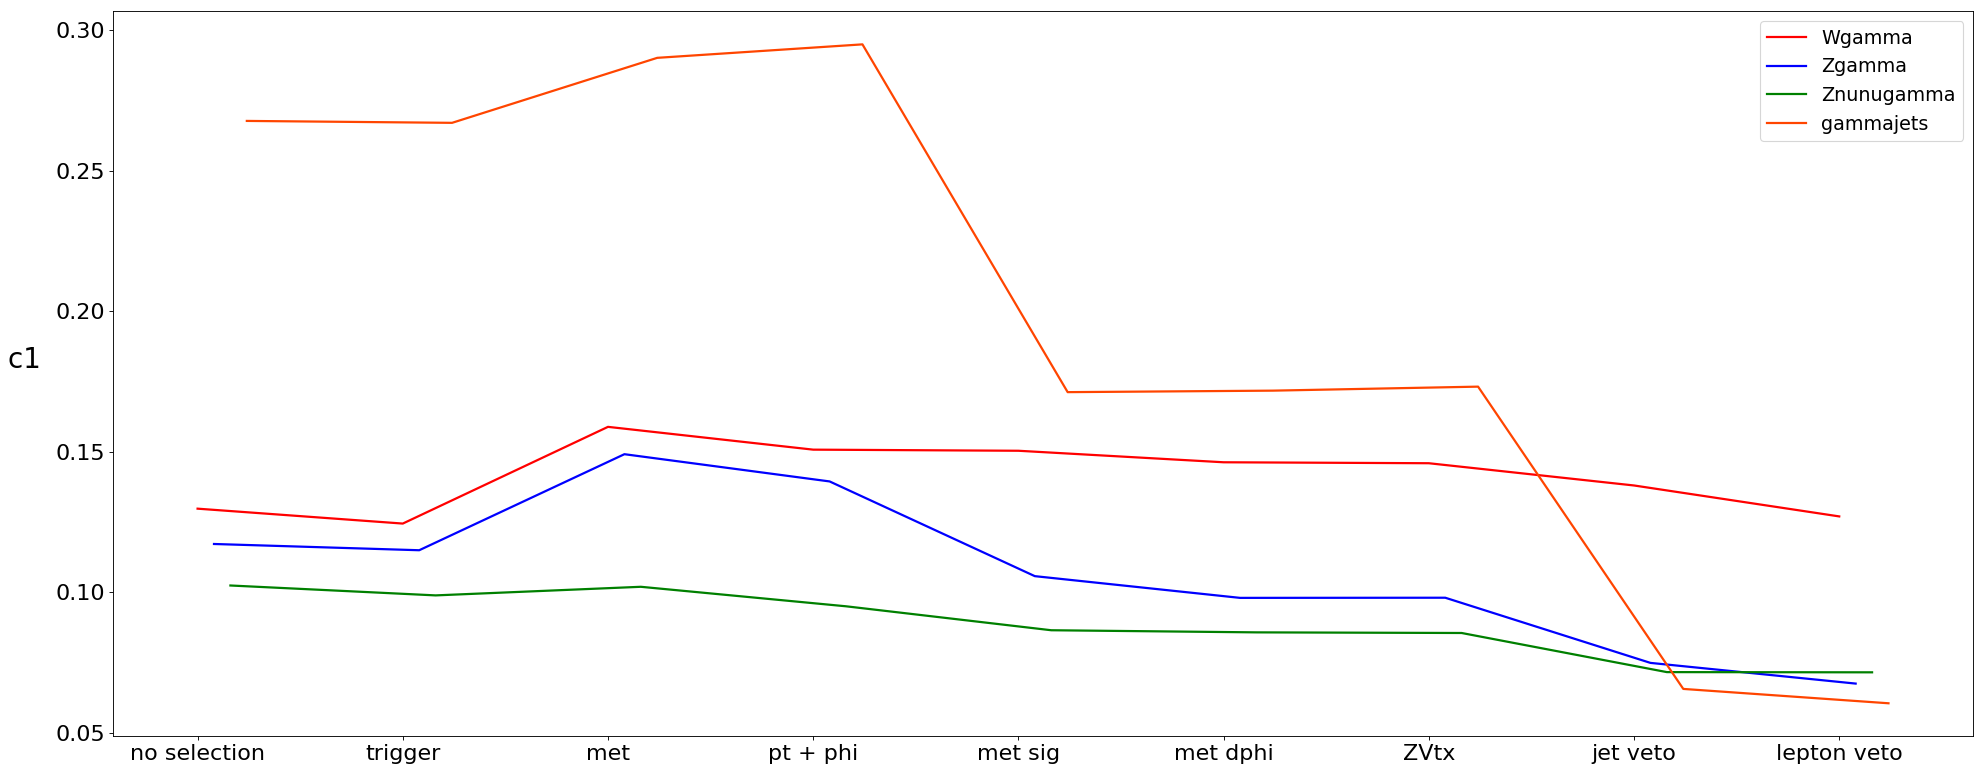

In [5]:
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
j=0
for key in signal:
    
    plt.errorbar([i+j*0.08 for i in range(len(c1[key]['mean']))], c1[key]['mean'], fmt=color[j], marker='', linestyle='-', linewidth=2, label=key) 
    j = j + 1
    

plt.yticks(fontsize=20)
plt.ylabel('c1      ', fontsize=25, rotation=0)
plt.xticks(range(9), ['no selection', 'trigger', 'met', 'pt + phi', 'met sig', 'met dphi', 'ZVtx', 'jet veto', 'lepton veto'], fontsize=20)
plt.legend(fontsize='xx-large')